# Initial Data Exploration

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# original matrix
ratings_df = pd.read_csv("data/rating_matrix.csv")
ratings_df

,userId,1,2,3,4,5,6,7,8,9,...,141,142,143,144,145,146,147,148,149,150
0,1,NaN,NaN,NaN,NaN,0.219,NaN,-9.281,-9.281,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,NaN,NaN,-9.688,NaN,9.938,9.531,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,NaN,NaN,NaN,-9.844,NaN,-9.844,-7.219,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN,-5.812,NaN,-4.500,-4.906,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,6.906,NaN,4.750,-5.906,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59127,63974,NaN,NaN,NaN,NaN,NaN,NaN,-4.438,1.531,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59128,63975,NaN,NaN,NaN,NaN,NaN,NaN,0.625,4.531,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59129,63976,NaN,NaN,NaN,NaN,NaN,NaN,-7.250,4.562,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59130,63977,NaN,NaN,NaN,NaN,NaN,NaN,-8.531,-8.438,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


None values

In [3]:
total_nans = ratings_df.iloc[:, 1:].isna().sum().sum()
print(f"Total NaN values in matrix: {total_nans}")

Total NaN values in matrix: 7108361


In [4]:
total_cells = (len(ratings_df) * len(ratings_df.columns[1:]))
missing_percentage = (total_nans / total_cells) * 100

print(f"\nPercentage of missing ratings: {missing_percentage:.2f}%")


Percentage of missing ratings: 80.14%


In [15]:


def plot_rating_distributions(ratings_df):
    """
    Plots the distribution of filled ratings for users and jokes.
    
    Args:
        ratings_df: DataFrame with userId as first column and jokes as other columns
    """
    plt.figure(figsize=(14, 6))
    
    # User distribution (left plot)
    user_counts = ratings_df.iloc[:, 1:].count(axis=1)
    plt.subplot(1, 2, 1)
    sns.histplot(user_counts, bins=30, kde=True)
    plt.title('Ratings per User Distribution')
    plt.xlabel('Number of Ratings Given')
    plt.ylabel('Number of Users')
    
    # Joke distribution (right plot)
    joke_counts = ratings_df.iloc[:, 1:].count(axis=0)
    plt.subplot(1, 2, 2)
    sns.histplot(joke_counts, bins=30, kde=True, color='orange')
    plt.title('Ratings per Joke Distribution')
    plt.xlabel('Number of Ratings Received')
    plt.ylabel('Number of Jokes')
    
    plt.tight_layout()
    plt.show()

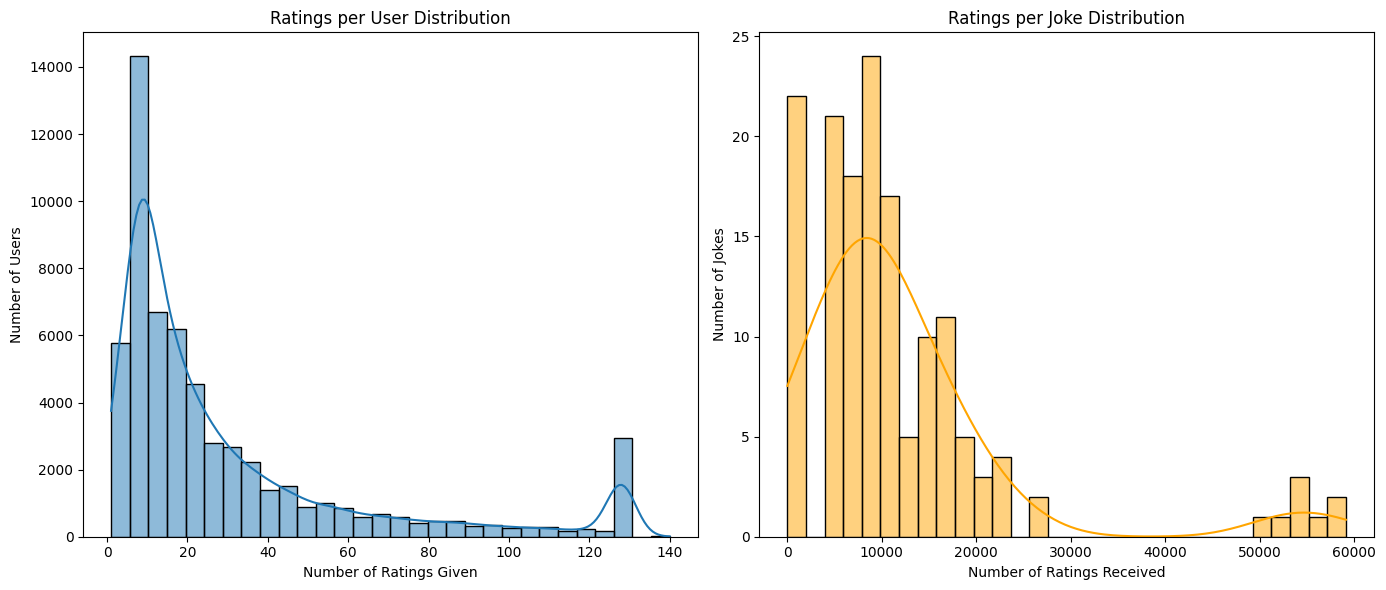

In [16]:
plot_rating_distributions(ratings_df)

In [21]:
def filter_by_rating_count(ratings_df, user_threshold=0, joke_threshold=0):
    """
    Filters users and jokes based on minimum number of ratings.
    
    Args:
        ratings_df: Input DataFrame with userId column and joke columns
        user_threshold: Minimum number of ratings a user must have
        joke_threshold: Minimum number of ratings a joke must have
    
    Returns:
        Tuple of (filtered_df, active_users_df, popular_jokes_df)
    """
    # Calculate rating counts
    user_counts = ratings_df.iloc[:, 1:].count(axis=1)
    joke_counts = ratings_df.iloc[:, 1:].count(axis=0)
    
    # Filter users
    active_users = ratings_df[user_counts >= user_threshold].copy()
    active_users_df = pd.DataFrame({
        'userId': active_users['userId'],
        'rating_count': user_counts[user_counts >= user_threshold]
    })
    
    # Filter jokes
    popular_jokes = joke_counts[joke_counts >= joke_threshold]
    popular_jokes_df = pd.DataFrame({
        'jokeId': popular_jokes.index,
        'rating_count': popular_jokes.values
    })
    
    # Filter original dataframe
    filtered_df = ratings_df[
        ratings_df['userId'].isin(active_users['userId'])
    ].copy()
    filtered_df = filtered_df[['userId'] + list(popular_jokes.index)]
    
    return filtered_df, active_users_df, popular_jokes_df

In [25]:
_, active_users_df, popular_jokes_df = filter_by_rating_count(ratings_df, user_threshold=30, joke_threshold=5000)


In [26]:
active_users_df

,userId,rating_count
0,1,62
1,2,34
4,5,82
6,7,46
7,8,99
...,...,...
59106,63947,68
59107,63949,128
59108,63950,128
59109,63951,32


In [27]:
popular_jokes_df

,jokeId,rating_count
0,7,59122
1,8,57720
2,13,56333
3,15,54932
4,16,54150
...,...,...
113,145,12534
114,147,9728
115,148,14988
116,149,10969


Ratings

Analyzing jokes, users

In [17]:
def analyze_users(ratings_df):
    """
    Analyze user statistics from the rating matrix.
    
    Args:
        ratings_df: DataFrame with userId as first column and jokes as other columns
    
    Returns:
        DataFrame with user statistics (mean, count, std, min, max, median)
    """

    rating_columns = ratings_df.columns[1:]
    
    user_stats = pd.DataFrame({
        'userId': ratings_df['userId'],
        'mean_rating': ratings_df[rating_columns].mean(axis=1, skipna=True),
        'rating_count': ratings_df[rating_columns].count(axis=1),
        'std_rating': ratings_df[rating_columns].std(axis=1, skipna=True),
        'min_rating': ratings_df[rating_columns].min(axis=1, skipna=True),
        'max_rating': ratings_df[rating_columns].max(axis=1, skipna=True),
        'median_rating': ratings_df[rating_columns].median(axis=1, skipna=True)
    })
    
    return user_stats

def analyze_jokes(ratings_df):
    """
    Analyze joke statistics from the rating matrix.
    
    Args:
        ratings_df: DataFrame with userId as first column and jokes as other columns
    
    Returns:
        DataFrame with joke statistics (mean, count, std, min, max, median)
    """

    joke_stats = pd.DataFrame({
        'jokeId': ratings_df.columns[1:],
        'mean_rating': ratings_df.iloc[:, 1:].mean(axis=0, skipna=True),
        'rating_count': ratings_df.iloc[:, 1:].count(axis=0),
        'std_rating': ratings_df.iloc[:, 1:].std(axis=0, skipna=True),
        'min_rating': ratings_df.iloc[:, 1:].min(axis=0, skipna=True),
        'max_rating': ratings_df.iloc[:, 1:].max(axis=0, skipna=True),
        'median_rating': ratings_df.iloc[:, 1:].median(axis=0, skipna=True)
    })
    
    return joke_stats

In [18]:
analyze_users(ratings_df).head(15)

,userId,mean_rating,rating_count,std_rating,min_rating,max_rating,median_rating
0,1,2.094694,62,6.702183,-9.656,9.906,1.4375
1,2,3.739029,34,6.399357,-9.688,9.938,4.8750
2,3,-6.817667,18,4.432632,-9.969,1.250,-9.7965
3,4,-5.072667,3,0.671691,-5.812,-4.500,-4.9060
4,5,2.600195,82,3.075130,-7.906,8.000,2.7810
5,6,-2.206037,27,6.703893,-9.438,8.406,-5.0940
6,7,0.981022,46,1.322126,-2.906,4.188,1.1560
7,8,1.805525,99,3.476067,-7.438,8.781,1.2810
8,9,5.552133,15,7.153279,-9.531,9.750,8.8440
9,10,1.812212,104,3.409949,-6.312,9.531,1.4375


In [19]:
analyze_jokes(ratings_df).head(15)

,jokeId,mean_rating,rating_count,std_rating,min_rating,max_rating,median_rating
1,1,NaN,0,NaN,NaN,NaN,NaN
2,2,NaN,0,NaN,NaN,NaN,NaN
3,3,NaN,0,NaN,NaN,NaN,NaN
4,4,NaN,0,NaN,NaN,NaN,NaN
5,5,-1.756331,661,5.709489,-10.0,9.969,-2.531
6,6,NaN,0,NaN,NaN,NaN,NaN
7,7,-1.809230,59122,5.574303,-10.0,10.000,-2.531
8,8,-0.672010,57720,5.315559,-10.0,10.000,-0.375
9,9,NaN,0,NaN,NaN,NaN,NaN
10,10,NaN,0,NaN,NaN,NaN,NaN
